<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: kriging standard 1D </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Kriging standard
- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200


# Theoretical variogram 



In [4]:
from phyton_kriging import np, sp, plt

from phyton_kriging.variogram_1D import theoretical
from phyton_kriging.standard_1D import kriging1D

In [5]:
h = np.linspace(0, 10, 1000)


In [6]:
sc = .2
I0 = .00001

var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=1.25)
var_theo.draw()
print(var_theo)

0.2 1 [ 0.      0.01    0.02    0.03    0.04    0.0501  0.0601  0.0701  0.0801
  0.0901  0.1001  0.1101  0.1201  0.1301  0.1401  0.1502  0.1602  0.1702
  0.1802  0.1902  0.2002  0.2102  0.2202  0.2302  0.2402  0.2503  0.2603
  0.2703  0.2803  0.2903  0.3003  0.3103  0.3203  0.3303  0.3403  0.3504
  0.3604  0.3704  0.3804  0.3904  0.4004  0.4104  0.4204  0.4304  0.4404
  0.4505  0.4605  0.4705  0.4805  0.4905  0.5005  0.5105  0.5205  0.5305
  0.5405  0.5506  0.5606  0.5706  0.5806  0.5906  0.6006  0.6106  0.6206
  0.6306  0.6406  0.6507  0.6607  0.6707  0.6807  0.6907  0.7007  0.7107
  0.7207  0.7307  0.7407  0.7508  0.7608  0.7708  0.7808  0.7908  0.8008
  0.8108  0.8208  0.8308  0.8408  0.8509  0.8609  0.8709  0.8809  0.8909
  0.9009  0.9109  0.9209  0.9309  0.9409  0.951   0.961   0.971   0.981
  0.991   1.001   1.011   1.021   1.031   1.041   1.0511  1.0611  1.0711
  1.0811  1.0911  1.1011  1.1111  1.1211  1.1311  1.1411  1.1512  1.1612
  1.1712  1.1812  1.1912  1.2012  1.2112  1.22

In [7]:
def f_signal(x, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    y=np.cos(2 * np.pi * x / 10)
    y=y + sc * np.random.randn(num_sensors)
    y = y + 2*I0 * (np.random.rand(num_sensors)-0.5)

    return y

In [8]:
num_sampling = 250
sampling = np.linspace(-10, 10, num_sampling)

y_ideal = f_signal(sampling,0,0)


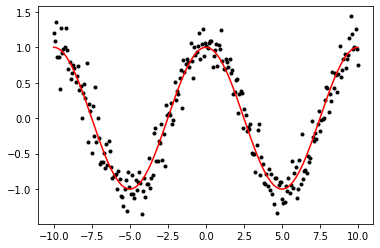

In [9]:
num_sensors = 250

sensors = np.zeros((num_sensors, 3), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
x = np.linspace(-10, 10, num_sensors)

sensors[:, 0] = x
sensors[:, 1] = f_signal(x, sc, I0)
sensors[:, 2] = I0 * np.ones_like(sensors[:, 0])

signal = f_signal(x, sc, I0)

plt.plot(sensors[:, 0], sensors[:, 1], 'k.')
plt.plot(sensors[:,0],f_signal(x, 0, 0),'r')

In [10]:
krig1 = kriging1D(sensors=sensors, variogram=var_theo, sampling=sampling)
krig1.y_ideal=y_ideal


In [11]:
krig1.standard()

error_real = krig1.estimation - y_ideal

0.2 1 [[ 0.      0.0803  0.1606 ... 19.8394 19.9197 20.    ]
 [ 0.0803  0.      0.0803 ... 19.759  19.8394 19.9197]
 [ 0.1606  0.0803  0.     ... 19.6787 19.759  19.8394]
 ...
 [19.8394 19.759  19.6787 ...  0.      0.0803  0.1606]
 [19.9197 19.8394 19.759  ...  0.0803  0.      0.0803]
 [20.     19.9197 19.8394 ...  0.1606  0.0803  0.    ]] 1.25
0.2 1 [[ 0.      0.0803  0.1606 ... 19.8394 19.9197 20.    ]
 [ 0.0803  0.      0.0803 ... 19.759  19.8394 19.9197]
 [ 0.1606  0.0803  0.     ... 19.6787 19.759  19.8394]
 ...
 [19.8394 19.759  19.6787 ...  0.      0.0803  0.1606]
 [19.9197 19.8394 19.759  ...  0.0803  0.      0.0803]
 [20.     19.9197 19.8394 ...  0.1606  0.0803  0.    ]] 1.25
0.2 1 0.0 1.25


In [12]:
krig1.draw(kind='sensor')

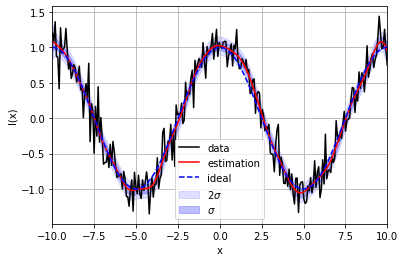

In [13]:
krig1.draw(kind='kriging')

In [14]:
error = signal-krig1.estimation

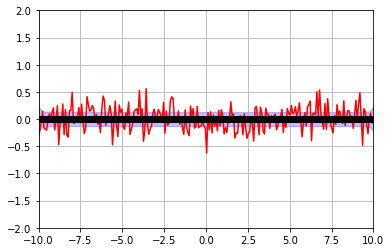

In [15]:
plt.plot(sampling, error, 'r')
plt.plot(sensors[:, 0], np.zeros_like(sensors[:, 0]), 'ko')

plt.fill_between(sampling, - 2*krig1.error, 2*krig1.error, color='blue', alpha=0.25)
plt.xlim(sampling[0], sampling[-1])
plt.grid('on')
plt.ylim(-2,2)

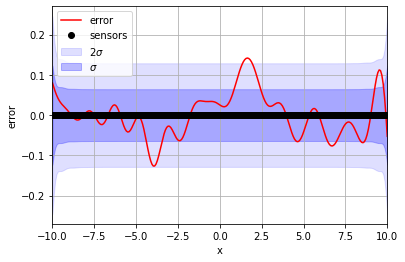

In [16]:
krig1.draw('error', ylabel='error')

0.06561592941334643


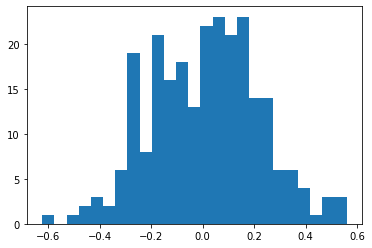

In [17]:
plt.hist(error,bins=25)
print(krig1.error.mean())

## Preparar para convolucion

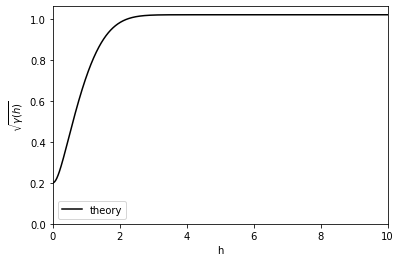

In [18]:
krig1.draw('variogram')

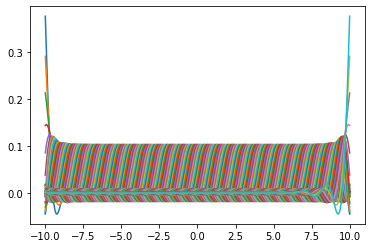

In [19]:
krig1.draw('lambdas')

### Check $\sum \lambda_s = 1$

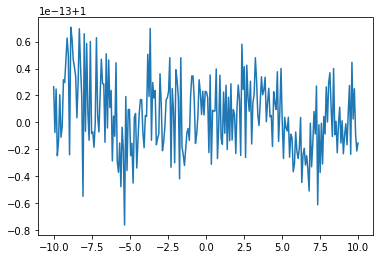

In [20]:
plt.plot(sampling, krig1.lambdas.sum(axis=1))